In [1]:
from google.cloud import storage
from google.oauth2 import service_account

import geopandas as gpd
import os
from pathlib import Path
from io import BytesIO

# Load environment variables from .env file
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
project_root = Path.cwd().parent
credentials_path = project_root / os.getenv("GOOGLE_APPLICATION_CREDENTIALS")

# Initialize client with credentials and project from environment
credentials = service_account.Credentials.from_service_account_file(
    str(credentials_path)
)
client = storage.Client(
    credentials=credentials, project=os.getenv("GOOGLE_CLOUD_PROJECT")
)

# Get bucket name from environment
bucket_name = os.getenv("GOOGLE_CLOUD_BUCKET")
bucket = client.bucket(bucket_name)

In [18]:
import pandas as pd

datos_censales = pd.read_parquet('/home/nissim/Documents/dev/ciut-redatam/datos_censales_2022.parquet')

In [19]:
datos_censales.head()

,geo_id,provvalue,provlabel,dptovalue,dptolabel,radvalue,radlabel,H10_1,H10_2,H10_3,...,H14_2,H14_3,H14_4,H14_5,H14_6,NBI_VIV_1,NBI_VIV_2,total_population,total_viviendas,total_hogares
0,020070101,02,Caba,007,007,01,01,79.0,21.0,1.0,...,5.0,1.0,0.0,0.0,1.0,11.0,95.0,18760,11599,9143
1,020070201,02,Caba,007,007,01,01,145.0,77.0,4.0,...,8.0,1.0,0.0,0.0,2.0,12.0,219.0,18760,11599,9143
2,020070202,02,Caba,007,007,02,02,122.0,45.0,1.0,...,9.0,1.0,0.0,0.0,4.0,13.0,157.0,19994,12222,9839
3,020070203,02,Caba,007,007,03,03,70.0,25.0,6.0,...,4.0,0.0,0.0,0.0,3.0,9.0,93.0,17016,10891,8456
4,020070204,02,Caba,007,007,04,04,150.0,58.0,1.0,...,11.0,0.0,0.0,1.0,3.0,8.0,203.0,18684,11631,9242


In [5]:
radios_censales = gpd.read_file('/home/nissim/Documents/dev/ciut-redatam/RADIOS_2022_V2025-1/Radios 2022 v2025-1.shp')

In [21]:
# left join radios censales with datos censales by geo_id in datos_censales and COD_2022 in radios_censales
radios_censales = radios_censales.merge(datos_censales, left_on='COD_2022', right_on='geo_id', how='left')
radios_censales.shape


(66502, 64)

<Axes: >

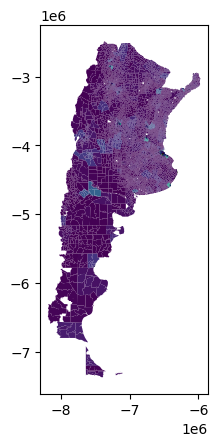

In [23]:
radios_censales.plot('total_population')

In [24]:
radios_censales.to_parquet('/home/nissim/Documents/dev/ciut-redatam/datos_censales_2022_geo.parquet')

In [8]:
radios_censales.shape

(66502, 10)

In [13]:
203383 // 66505

3

In [12]:
radios_censales.head()

,COD_2022,PROV,DEPTO,FRACC,RADIO,OBS2022,VIV_TOT_P,POB_TOT_P,REDATAM,geometry
0,020070101,02,007,01,01,None,105,244,SI,"POLYGON ((-6497606.14 -4107184.313, -6497602.0..."
1,020070210,02,007,02,10,None,121,375,SI,"POLYGON ((-6498768.248 -4107346.668, -6498753...."
2,020070909,02,007,09,09,None,643,1003,SI,"POLYGON ((-6498312.202 -4109797.474, -6498470...."
3,020281906,02,028,19,06,None,458,1191,SI,"POLYGON ((-6496573.555 -4114615.369, -6496591...."
4,020281907,02,028,19,07,None,248,613,SI,"POLYGON ((-6496263.947 -4114467.492, -6496279...."


In [8]:
# List objects in the bucket
print(f"Listing objects in {bucket_name}:")
blobs = list(bucket.list_blobs(max_results=10))
for blob in blobs:
    print(f"- {blob.name}")

Listing objects in ciut-tablero:
- 2023/
- 2023/MAPAS/LP_Riesgo Hidrico.jpeg
- 2023/MAPAS/LP_Riesgo Hidrico.pdf
- 2023/MAPAS/LP_Vulnerabilidad-Sintesis.jpeg
- 2023/MAPAS/LP_Vulnerabilidad-Sintesis.pdf
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Exposicion.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Riesgo.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad ambiental.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad socieconomica.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad.jpeg


In [9]:
# List all blobs in the 2024 directory
prefix = "2024/"
print(f"Searching for GIS files in {prefix}...")

# Get all blobs with the prefix
blobs = bucket.list_blobs(prefix=prefix)

# Filter for GIS files
gis_files = []
for blob in blobs:
    if blob.name.lower().endswith((".shp", ".geojson", ".json")):
        gis_files.append(blob.name)

# Print results
if gis_files:
    print("\nFound GIS files:")
    for file in gis_files:
        print(f"- {file}")
else:
    print("\nNo GIS files found in 2024 directory")

Searching for GIS files in 2024/...

Found GIS files:
- 2024/R25_Riesgo_Rural.geojson
- 2024/R25_Riesgo_Urbano.geojson
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/Cuenca_Maldonado_v9b_smooth5.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/Dominio_2.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/H_100_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/H_25_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/S_100_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/S_25_cauces.shp
- 2024/archivos en JSON/JSON_Anteriores/R100_Riesgo_Rural.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_Riesgo_Urbano.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_peligrosidad.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_riesgo.geojson
- 2024/archivos en JSON/JSON_Anteriores/R25_peligrosidad.geojson
- 2024/archivos en JSON/JSON_Anteriores/R25_riesgo.geojson


In [10]:
riesgo_rural_blob = bucket.blob("2024/R25_Riesgo_Rural.geojson")
riesgo_rural_content = riesgo_rural_blob.download_as_bytes()
riesgo_rural = gpd.read_file(BytesIO(riesgo_rural_content))

In [11]:
riesgo_rural.head()

,fid,link,PROV,DEPTO,CODLOC,FRAC,RADIO,MZA,ambiental,fisica,socioeco,exposicion,vulnerab,densidad,peli,riesgo,geometry
0,1,064414111,06,441,441,41,11,006,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411861.621 6128538.962, 64117..."
1,2,064414111,06,441,441,41,11,005,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411729.336 6128678.183, 64117..."
2,3,064414111,06,441,441,41,11,007,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411841.116 6128517.533, 64118..."
3,4,064414111,06,441,441,41,11,003,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411534.911 6129308.313, 64115..."
4,5,064414111,06,441,441,41,11,005,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411569.073 6128799.481, 64118..."


<Axes: >

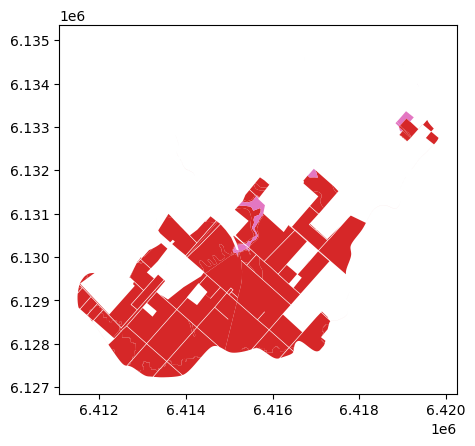

In [12]:
riesgo_rural.plot("riesgo")

In [13]:
riesgo_urbano_blob = bucket.blob("2024/R25_Riesgo_Urbano.geojson")
riesgo_urbano_content = riesgo_urbano_blob.download_as_bytes()
riesgo_urbano = gpd.read_file(BytesIO(riesgo_urbano_content))

In [14]:
riesgo_urbano.head()

,fid,link,PROV,DEPTO,CODLOC,FRAC,RADIO,MZA,ambiental,fisica,socioeco,exposicion,vulnerab,densidad,peli,riesgo,geometry
0,1,064416817,06,441,441,68,17,011,1,0,0,1,2,0.17,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6412327.673 6128148.009, 64123..."
1,2,064413714,06,441,441,37,14,001,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411562.387 6129389.394, 64116..."
2,3,064413714,06,441,441,37,14,011,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6412810.718 6129745.449, 64128..."
3,4,064413714,06,441,441,37,14,010,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6412879.468 6129882.172, 64128..."
4,5,064413714,06,441,441,37,14,015,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6413362.402 6129595.31, 641367..."


<Axes: >

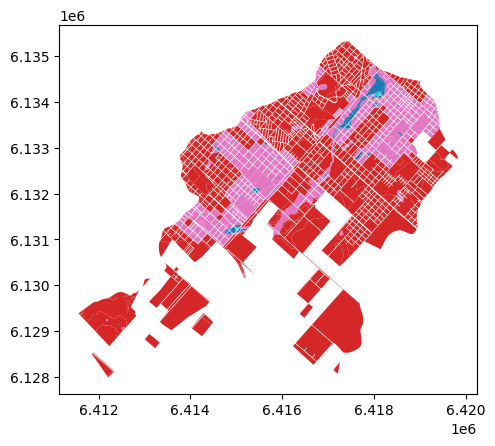

In [15]:
riesgo_urbano.plot("riesgo")

In [16]:
r100_peligrosidad_blob = bucket.blob(
    "2024/archivos en JSON/JSON_Anteriores/R100_peligrosidad.geojson"
)
r100_peligrosidad_content = r100_peligrosidad_blob.download_as_bytes()
r100_peligrosidad = gpd.read_file(BytesIO(r100_peligrosidad_content))

In [19]:
r100_peligrosidad.head()

,OBJECTID,Id,gridcode,Shape_Leng,Shape_Area,Profundida,Peligro,OBJECTID_2,Id_2,gridcode_2,Shape_Le_1,Shape_Ar_1,Profundi_1,Peligro_2,layer,path,geometry
0,11,11,4,20.000000,25.000000,> 0.70,ALTO,None,None,None,None,None,None,None,R100_Alto,C:/Users/Usuario/Desktop/CIUT/agosto24/Manchas...,"MULTIPOLYGON (((6411812.323 6130030.219, 64118..."
1,208,208,2,64.393522,241.987061,0.10 - 0.40,BAJO,None,None,None,None,None,None,None,R100_Bajo_ok,C:/Users/Usuario/Desktop/CIUT/agosto24/Manchas...,"MULTIPOLYGON (((6412357.355 6128963.068, 64123..."
2,78,78,3,1582.592646,67089.003268,0.40 - 0.70,MEDIO,None,None,None,None,None,None,None,R100_Medio_ok,C:/Users/Usuario/Desktop/CIUT/agosto24/Manchas...,"MULTIPOLYGON (((6412129.035 6129276.388, 64121..."


<Axes: >

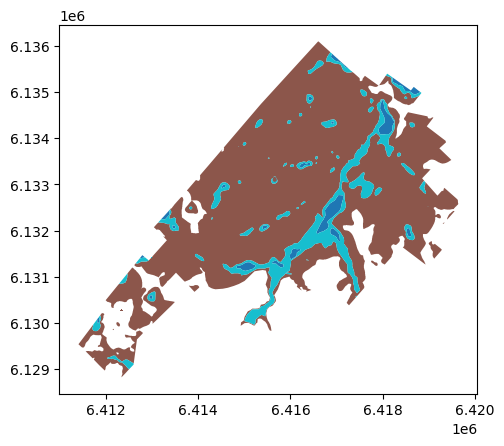

In [20]:
r100_peligrosidad.plot("Peligro")

In [22]:
# List all blobs in the 2024 directory
prefix = "2023/"
print(f"Searching for GIS files in {prefix}...")

# Get all blobs with the prefix
blobs = bucket.list_blobs(prefix=prefix)

# Filter for GIS files
gis_files = []
for blob in blobs:
    if blob.name.lower().endswith((".shp", ".geojson", ".json")):
        gis_files.append(blob.name)

# Print results
if gis_files:
    print("\nFound GIS files:")
    for file in gis_files:
        print(f"- {file}")
else:
    print("\nNo GIS files found in 2023 directory")

Searching for GIS files in 2023/...

Found GIS files:
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Shape/LP_Vulnerabilidad-Exposicion-Riesgo_23.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/RIESGO 2019/RIESGO_2019.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/RIESGO 2049/V_RURAL_2049.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/RIESGO 2049/V_URBANO_2049_f6.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/Sim_integrada.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/VULNERABILIDAD 2019/RURAL/Vu_rural_BAJA_lp.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/VULNERABILIDAD 2019/RURAL/Vu_rural_Berisso.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/VULNERABILIDAD 2019/RURAL/Vu_rural_Ensenada.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/VULNERABILIDAD 2019/RURAL/Vu_rural_MEDIA_lp.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/VULNERABILIDAD 2019/URBANA/VULNERABILIDAD_ByE.shp
- 2023/RRI-SHP/Antecedentes RRI 2019/SHAPES/VULNERABILIDAD 2019/URBANA/VULNERABILIDAD_lp.shp
-

In [ ]:
# pull in peligrosidad
# pull in population data points
# pull in vulnerability data points
# calculate summary stats per cuenca (will need cuenca data)

# OPTIONAL: dasymmetric mapping with GHSL landcover
# (choose GHSL because can be combined with historic census data back to 1990)